In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

from utils.utils import load_data, remove_zero_features, load_confounders, standardize, generate_label_stats, generate_undersampled_set, generate_oversampled_set
from utils.plot_utils import aggregate_diagnoses, plot_diagnosis_frequency, plot_diagnosis_prevalence
from utils.plot_utils import plot_demographics, plot_feature_confounder_relation
from utils.plot_utils_umap import plot_umap_combined, plot_umap_cluster

from sklearn.model_selection import train_test_split

In [3]:
# Load data for classification task
subject_data, features, diagnoses = load_data('classification')

In [4]:
C = load_confounders(subject_data, case='raw')
D = diagnoses.iloc[:,1:]

In [5]:
# Remove zero features
F = remove_zero_features(features.iloc[:,1:])
# Standardize
X = standardize(F)
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
# Remove ID column
Y = D
print(f"Number of labels: {Y.shape[1]}")

Number of samples: 2815
Number of features: 922
Number of labels: 13


---

In [6]:
# Load data for classification task
subject_data, _, _, _ = load_data('all')

In [7]:
subject_data["Site"].value_counts()

Site
CBIC    1489
RU      1007
CUNY     612
SI       343
Name: count, dtype: int64

# 1. Demographics

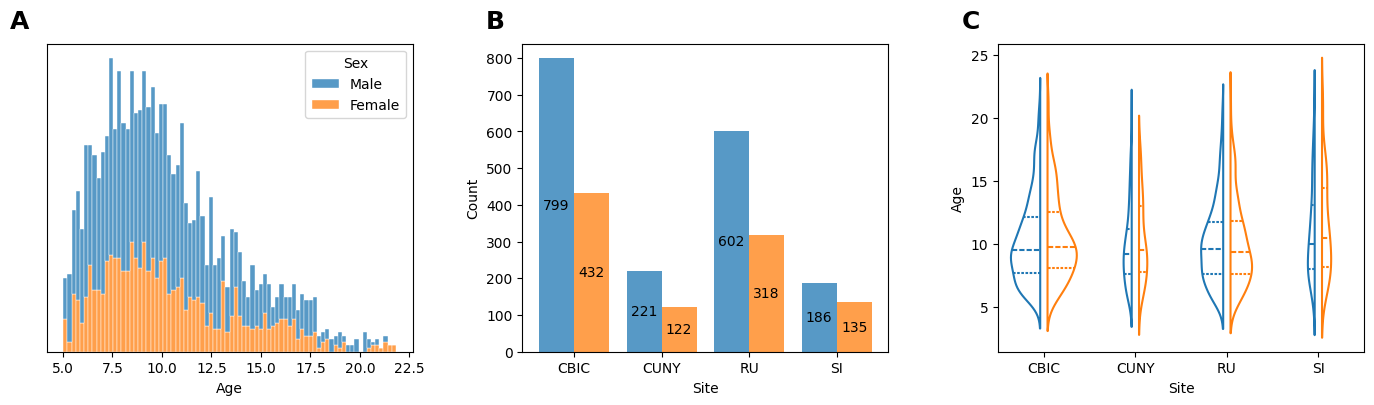

In [8]:
plot_demographics(C, 'the main dataset')

In [9]:
print(f"Mean: {C['Age'].mean():.2f}")
print(f"Std: {C['Age'].std():.2f}")
print(f"Median: {C['Age'].median():.2f}")
print(f"Min: {C['Age'].min():.2f}")
print(f"Max: {C['Age'].max():.2f}")

Mean: 10.27
Std: 3.37
Median: 9.61
Min: 5.02
Max: 21.82


In [10]:
male_female_ratio = C['Sex'].value_counts()['Male'] / C['Sex'].value_counts()['Female']
print(f"Male to Female ratio: {male_female_ratio:.2f}")

Male to Female ratio: 1.80


In [11]:
site_sex_counts = C.groupby(['Site', 'Sex']).size().unstack(fill_value=0)
site_sex_ratios = site_sex_counts['Male'] / site_sex_counts['Female']
print(site_sex_ratios)


Site
CBIC    1.849537
CUNY    1.811475
RU      1.893082
SI      1.377778
dtype: float64


In [12]:
subject_counts = C['Site'].value_counts()
print(subject_counts)

Site
CBIC    1231
RU       920
CUNY     343
SI       321
Name: count, dtype: int64


# 2. Diagnostic labels

## 2.1. Label statistics (for individual labels)

In [13]:
df = aggregate_diagnoses(C, D)

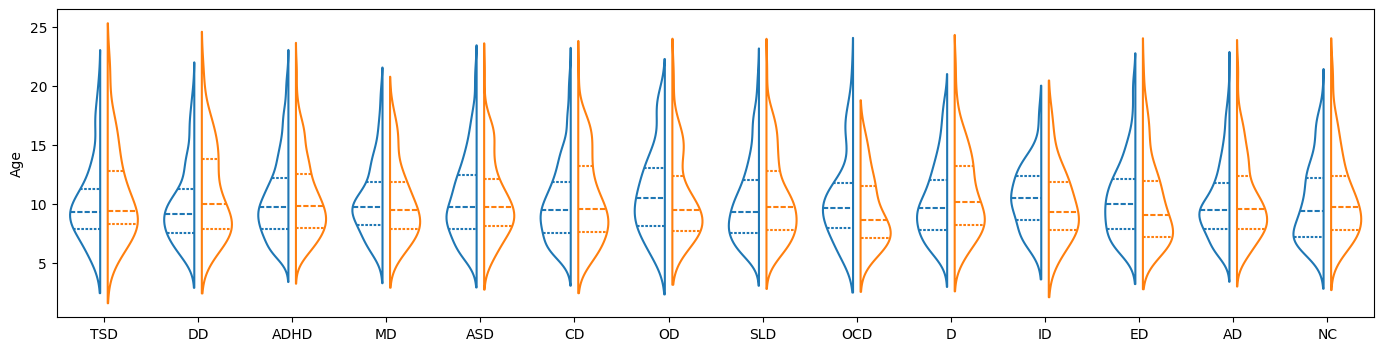

In [14]:
plot_diagnosis_frequency(df, 'morphometric_dataset')

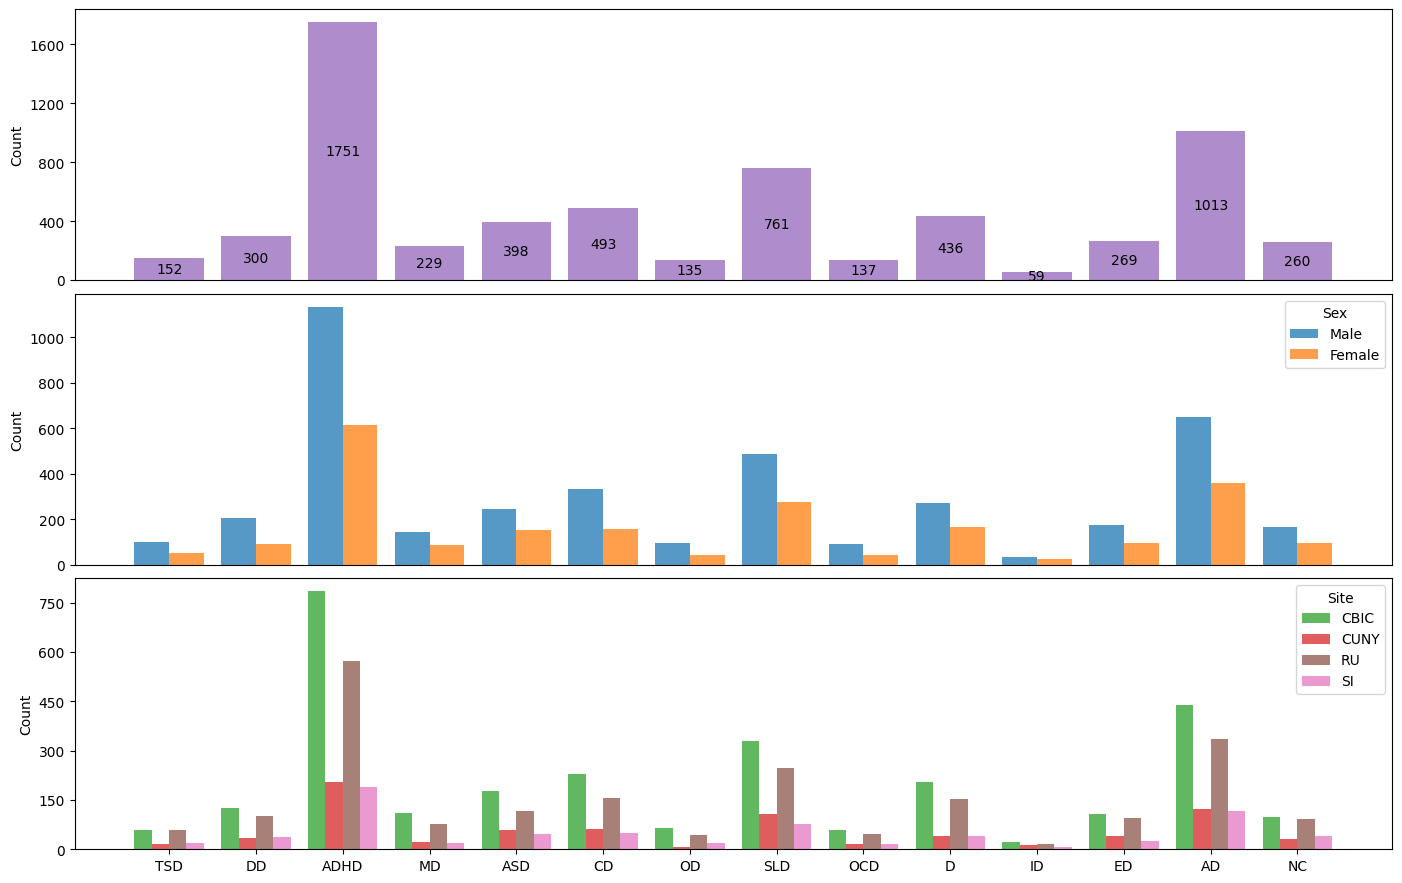

In [15]:
plot_diagnosis_prevalence(df, 'morphometric_dataset')

In [16]:
stats, mean_ir = generate_label_stats(D, mean_ir=True)
print(f"Mean imbalance ratio: {mean_ir:.4f}")
stats

Mean imbalance ratio: 7.9952


,Absolute frequency,Relative frequency,Imbalance ratio,Within-label imbalance
Trauma_And_Stress_RelatedDisorders,152,0.053996,11.519737,0.053996
DepressiveDisorders,300,0.106572,5.836667,0.106572
Attention_Deficit_HyperactivityDisorder,1751,0.622025,1.000000,0.622025
MotorDisorder,229,0.081350,7.646288,0.081350
AutismSpectrumDisorder,398,0.141385,4.399497,0.141385
CommunicationDisorder,493,0.175133,3.551724,0.175133
OtherDisorders,135,0.047957,12.970370,0.047957
SpecificLearningDisorder,761,0.270337,2.300920,0.270337
Obsessive_Compulsive_And_RelatedDisorders,137,0.048668,12.781022,0.048668
Disruptive,436,0.154885,4.016055,0.154885


In [17]:
stats_sorted = stats.sort_values(by='Absolute frequency', ascending=False)
stats_sorted


,Absolute frequency,Relative frequency,Imbalance ratio,Within-label imbalance
Attention_Deficit_HyperactivityDisorder,1751,0.622025,1.000000,0.622025
AnxietyDisorders,1013,0.359858,1.728529,0.359858
SpecificLearningDisorder,761,0.270337,2.300920,0.270337
CommunicationDisorder,493,0.175133,3.551724,0.175133
Disruptive,436,0.154885,4.016055,0.154885
AutismSpectrumDisorder,398,0.141385,4.399497,0.141385
DepressiveDisorders,300,0.106572,5.836667,0.106572
EliminationDisorder,269,0.095560,6.509294,0.095560
MotorDisorder,229,0.081350,7.646288,0.081350
Trauma_And_Stress_RelatedDisorders,152,0.053996,11.519737,0.053996


## 2.2. Set statistics (for label sets)
A label set with cardinality greater 1 is a case of comorbidity

In [18]:
print(f"Number of uniqe lable sets: {D.apply(tuple, axis=1).nunique()}")
print(f"Mean set cardinality: {D.sum(axis=1).mean():.2f}")
print(f"Median set cardinality: {D.sum(axis=1).median():.2f}")

Number of uniqe lable sets: 396
Mean set cardinality: 2.18
Median set cardinality: 2.00


In [19]:
head_size = 10
print(f"{head_size} most frequent label sets:")
combinations = D.apply(lambda x: tuple(x), axis=1).value_counts()
combinations.head(head_size)

10 most frequent label sets:


(0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)    316
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)    260
(0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)    116
(0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0)    109
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)    100
(0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0)    100
(0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0)     83
(0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0)     68
(0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1)     52
(0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)     48
Name: count, dtype: int64

In [20]:
print("Frequency of sets with cardinality 1 (occurence of one single disorder):")
combinations = D.apply(lambda x: tuple(x), axis=1).value_counts()
combinations = combinations[combinations.index.map(lambda x: sum(x) == 1)]
combinations

Frequency of sets with cardinality 1 (occurence of one single disorder):


(0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)    316
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)    100
(0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0)    100
(0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)     48
(0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0)     24
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0)     23
(0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)     22
(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)     22
(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0)     17
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)     15
(0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)     14
(0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0)      9
(0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0)      7
Name: count, dtype: int64

## 2.3. Label statistics for regular, undersampled and oversampled training sets

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
print(f"Number of samples in training set: {len(X_train)}")
print(f"Number of samples in test set: {len(X_test)}")

Number of samples in training set: 2111
Number of samples in test set: 704


### 2.3.1. Y_test

In [22]:
label_stats, mean_ir = generate_label_stats(Y, True)
print(f"Mean imbalance ratio: {mean_ir}")
label_stats

Mean imbalance ratio: 7.995236107963529


,Absolute frequency,Relative frequency,Imbalance ratio,Within-label imbalance
Trauma_And_Stress_RelatedDisorders,152,0.053996,11.519737,0.053996
DepressiveDisorders,300,0.106572,5.836667,0.106572
Attention_Deficit_HyperactivityDisorder,1751,0.622025,1.000000,0.622025
MotorDisorder,229,0.081350,7.646288,0.081350
AutismSpectrumDisorder,398,0.141385,4.399497,0.141385
CommunicationDisorder,493,0.175133,3.551724,0.175133
OtherDisorders,135,0.047957,12.970370,0.047957
SpecificLearningDisorder,761,0.270337,2.300920,0.270337
Obsessive_Compulsive_And_RelatedDisorders,137,0.048668,12.781022,0.048668
Disruptive,436,0.154885,4.016055,0.154885


In [23]:
label_stats['Within-label imbalance'].mean()

0.16759120098374092

### 2.3.2. Y_train regular

In [24]:
label_stats, mean_ir = generate_label_stats(Y_train, True)
print(f"Mean imbalance ratio: {mean_ir}")
label_stats

Mean imbalance ratio: 8.198046243793558


,Absolute frequency,Relative frequency,Imbalance ratio,Within-label imbalance
Trauma_And_Stress_RelatedDisorders,109,0.051634,12.192661,0.051634
DepressiveDisorders,217,0.102795,6.124424,0.102795
Attention_Deficit_HyperactivityDisorder,1329,0.629559,1.000000,0.629559
MotorDisorder,164,0.077688,8.103659,0.077688
AutismSpectrumDisorder,301,0.142586,4.415282,0.142586
CommunicationDisorder,367,0.173851,3.621253,0.173851
OtherDisorders,95,0.045002,13.989474,0.045002
SpecificLearningDisorder,582,0.275699,2.283505,0.275699
Obsessive_Compulsive_And_RelatedDisorders,97,0.045950,13.701031,0.045950
Disruptive,330,0.156324,4.027273,0.156324


In [25]:
label_stats['Within-label imbalance'].mean()

0.167802353970047

### 2.3.3. Y_train undersampled

In [26]:
X_under, Y_under = generate_undersampled_set(X_train, Y_train)
label_stats, mean_ir = generate_label_stats(Y_under, True)
print(f"Mean imbalance ratio: {mean_ir}")
label_stats

Mean imbalance ratio: 2.956543202759316


,Absolute frequency,Relative frequency,Imbalance ratio,Within-label imbalance
Trauma_And_Stress_RelatedDisorders,38,0.051701,4.473684,0.051701
DepressiveDisorders,80,0.108844,2.125000,0.108844
Attention_Deficit_HyperactivityDisorder,170,0.231293,1.000000,0.231293
MotorDisorder,52,0.070748,3.269231,0.070748
AutismSpectrumDisorder,101,0.137415,1.683168,0.137415
CommunicationDisorder,75,0.102041,2.266667,0.102041
OtherDisorders,35,0.047619,4.857143,0.047619
SpecificLearningDisorder,128,0.174150,1.328125,0.174150
Obsessive_Compulsive_And_RelatedDisorders,32,0.043537,5.312500,0.043537
Disruptive,74,0.100680,2.297297,0.100680


In [27]:
label_stats['Within-label imbalance'].mean()

0.10748299319727891

### 2.3.4. Y_train oversampled

In [28]:
X_over, Y_over = generate_oversampled_set(X_train, Y_train)
label_stats, mean_ir = generate_label_stats(Y_over, True)
print(f"Mean imbalance ratio: {mean_ir}")
label_stats

Mean imbalance ratio: 1.6752910161710401


,Absolute frequency,Relative frequency,Imbalance ratio,Within-label imbalance
Trauma_And_Stress_RelatedDisorders,1895,0.112296,2.105541,0.112296
DepressiveDisorders,2577,0.152711,1.548312,0.152711
Attention_Deficit_HyperactivityDisorder,3496,0.207170,1.141304,0.207170
MotorDisorder,2386,0.141393,1.672255,0.141393
AutismSpectrumDisorder,2820,0.167111,1.414894,0.167111
CommunicationDisorder,3459,0.204978,1.153513,0.204978
OtherDisorders,1769,0.104830,2.255512,0.104830
SpecificLearningDisorder,3990,0.236444,1.000000,0.236444
Obsessive_Compulsive_And_RelatedDisorders,2120,0.125630,1.882075,0.125630
Disruptive,2080,0.123259,1.918269,0.123259


In [29]:
label_stats['Within-label imbalance'].mean()

0.15107920227920227

## 2.4. Low-dimensional representation
Project labels to a lower-dimensional space using UMAP (embedding method)

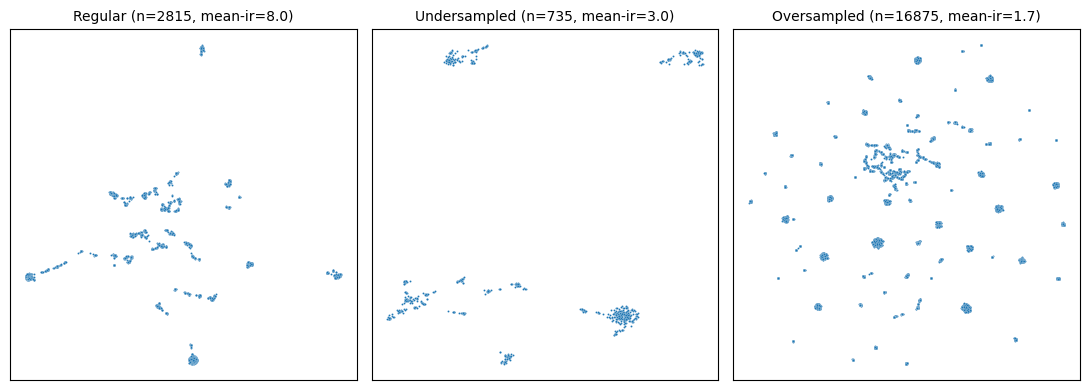

In [30]:
plot_umap_combined(X, Y, 'morphometric_dataset')

# 3. Morphometric features
Relationship between eTIV and confounding variables (age, sex)

In [31]:
F = features.iloc[:,1:]
f = pd.DataFrame()
f['TIV'] = F['global_estimatedtotalintracranialvol']
f['TIV'] = f['TIV']/1e6
df = pd.concat([f,C], axis=1)

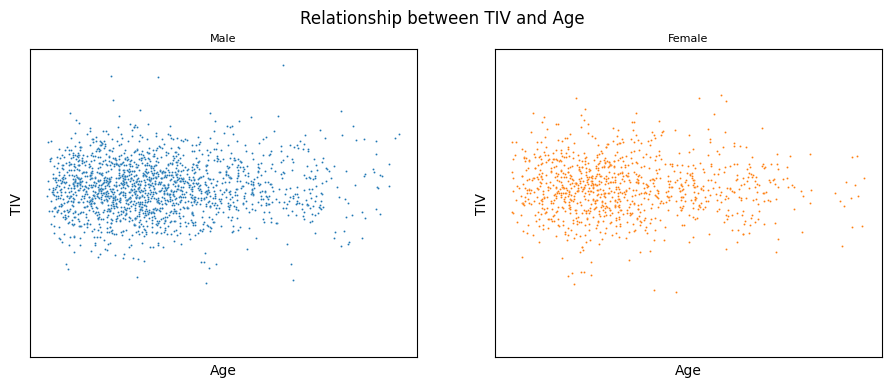

In [32]:
plot_feature_confounder_relation(df, 'TIV', 'Age', 'Sex', ['Male','Female'])

# 4. Brain images

In [33]:
# Load data for classification task
subject_data, _, diagnoses = load_data('classification_t1')

In [34]:
C = load_confounders(subject_data, case='raw')
D = diagnoses.iloc[:,1:]

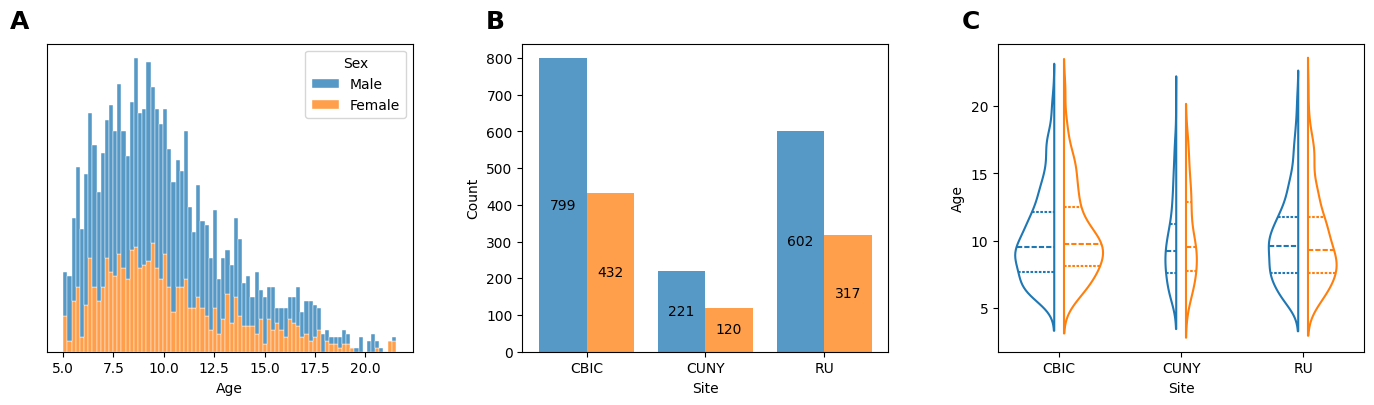

In [35]:
plot_demographics(C, 'brain_image_dataset')

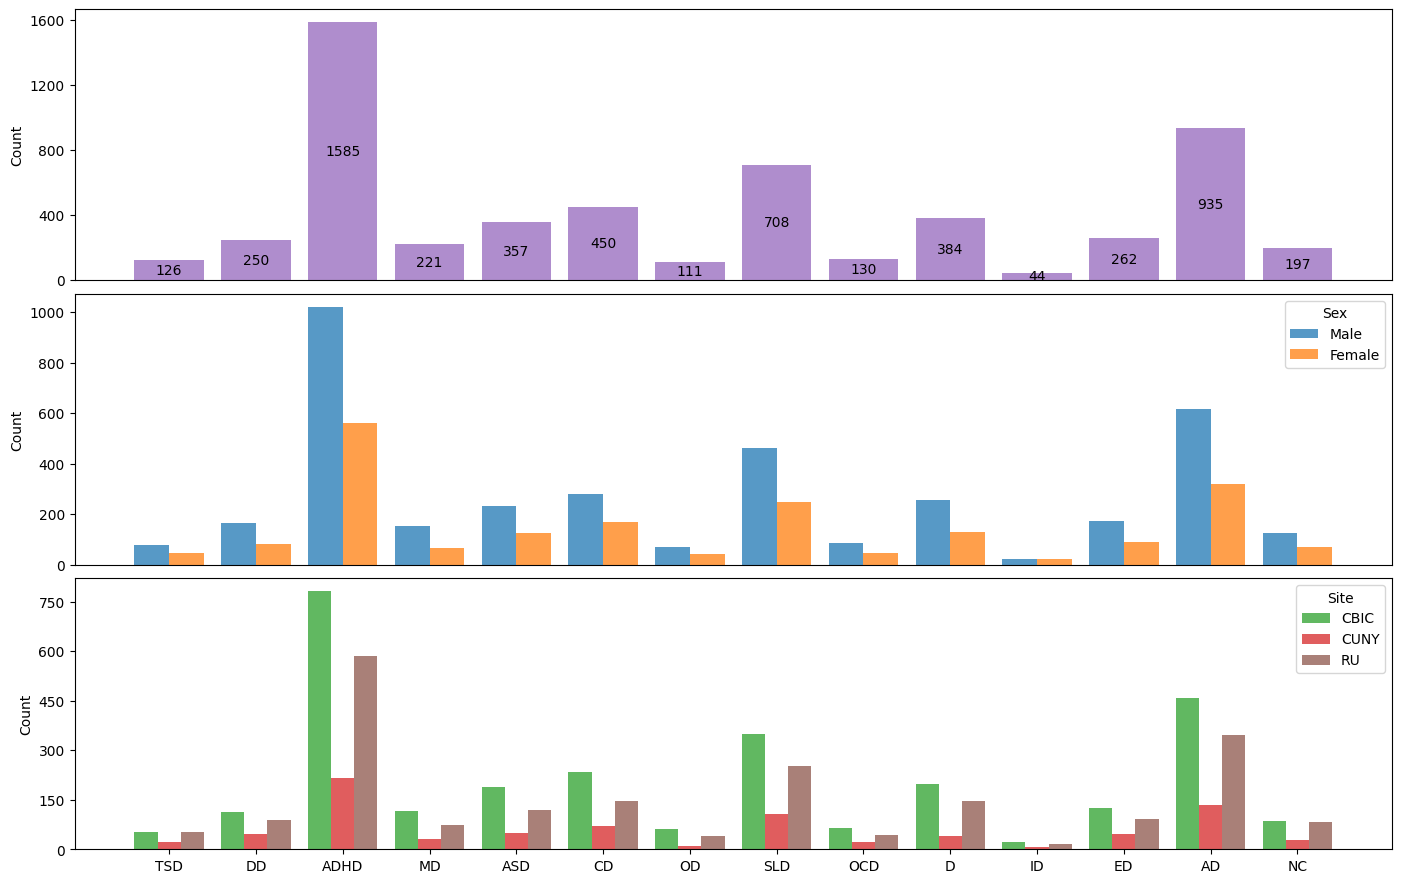

In [36]:
df = aggregate_diagnoses(C, D)
plot_diagnosis_prevalence(df, 'brain_image_dataset')

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(C, D, test_size=0.25, random_state=0)
print(f"Number of samples in training set: {len(X_train)}")
print(f"Number of samples in test set: {len(X_test)}")

Number of samples in training set: 1868
Number of samples in test set: 623


In [38]:
X_under, Y_under = generate_undersampled_set(X_train, Y_train)
label_stats, mean_ir = generate_label_stats(D, True)
print(mean_ir)
print(label_stats['Within-label imbalance'].mean())
label_stats

8.589133336588281
0.17178766636815615


,Absolute frequency,Relative frequency,Imbalance ratio,Within-label imbalance
Trauma_And_Stress_RelatedDisorders,126,0.050582,12.579365,0.050582
DepressiveDisorders,250,0.100361,6.340000,0.100361
Attention_Deficit_HyperactivityDisorder,1585,0.636291,1.000000,0.636291
MotorDisorder,221,0.088719,7.171946,0.088719
AutismSpectrumDisorder,357,0.143316,4.439776,0.143316
CommunicationDisorder,450,0.180650,3.522222,0.180650
OtherDisorders,111,0.044560,14.279279,0.044560
SpecificLearningDisorder,708,0.284223,2.238701,0.284223
Obsessive_Compulsive_And_RelatedDisorders,130,0.052188,12.192308,0.052188
Disruptive,384,0.154155,4.127604,0.154155
